# Numerical optimization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

## Example 1

Consider the minimization of the function

$$ f(x) = \exp[ (x-0.7)^2 ] $$

Analytically, we know the minimimum of $f$ is at $x=0.7$. To verify, we can plot $f(x)$ to see:

In [2]:
def f(x):
    return -np.exp(-(x - 0.7)**2)

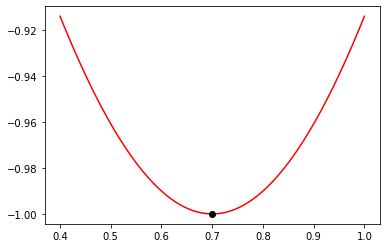

In [3]:
x=np.linspace(0.4, 1.0, 101)
plt.plot(x, f(x), 'r-')
plt.plot([0.7],f(0.7), 'ko')

In [4]:
# Use minimizer to get the minimum point

result = optimize.minimize_scalar(f)

In [5]:
# always check the documentation
#optimize.minimize_scalar?

In [6]:
result.success

True

In [7]:
result.x

0.6999999997839409

## Example 2

Consider another function

$$ f(x) = (x-x_0)^2 + \varepsilon \exp[ -5*(x-0.5-x_o)^2 ] $$

where $\varepsilon$ is 0 or 1. When $\varepsilon=0$, $f(x)$ is convex. When $\varepsilon=1$, $f(x)$ is non-convex.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x = np.linspace(-1, 3, 100)
x_0 = np.exp(-1)

def f(x):
    return (x - x_0)**2 + epsilon*np.exp(-5*(x - .5 - x_0)**2)

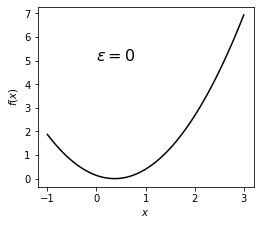

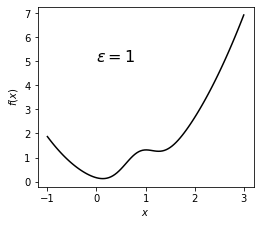

In [9]:
for epsilon in (0,1):
    plt.figure(figsize=(3, 2.5))
    plt.axes([0, 0, 1, 1])
    plt.plot(x, f(x),'k-')
    plt.text(0, 5, r'$\varepsilon=$' + '{}'.format(epsilon),size=16)
    plt.ylabel(r'$f(x)$')
    plt.xlabel(r'$x$')

We will use the following functions from numpy:
- finfo(): https://numpy.org/doc/stable/reference/generated/numpy.finfo.html

For example:

In [10]:
# For 64-bit binary floats in the IEEE-754 standard, eps = 2**-52, approx. 2e-16, i.e.
np.finfo(1.).eps

2.220446049250313e-16

Converged at  6 , x= 0.3678794411714422
Converged at  23 , x= 0.1281291282798001


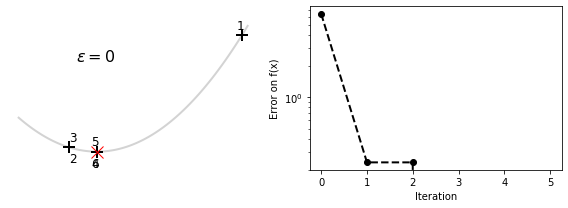

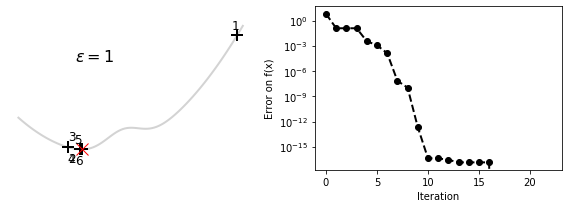

In [11]:
for epsilon in (0, 1):
    plt.figure(figsize=(8, 3))
    plt.axes([0, 0, 1, 1])

    # A convex function
    plt.subplot(1,2,1)
    plt.text(0, 5, r'$\varepsilon=$' + '{}'.format(epsilon),size=16)
    plt.plot(x, f(x), color='lightgray', linewidth=2)
    

    # Apply brent method. To have access to the iteration, do this in an
    # artificial way: allow the algorithm to iter only once
    all_x = list()
    all_y = list()
    for iter in range(30):
        result = optimize.minimize_scalar(f, bracket=(-5, 2.9, 4.5), method="Brent",
                    options={"maxiter": iter}, tol=np.finfo(1.).eps)
        if result.success:
            print('Converged at ', iter, ', x=', result.x)
            break

        this_x = result.x
        all_x.append(this_x)
        all_y.append(f(this_x))
        if iter < 6:
            # print iteration number near [this_x,f(this_x)]
            plt.text(this_x - .05*np.sign(this_x) - .05,
                    f(this_x) + 1.2*(.3 - iter % 2), iter + 1,
                    size=12)

    plt.plot(all_x[:10], all_y[:10], 'k+', markersize=12, markeredgewidth=2)

    plt.plot(all_x[-1], all_y[-1], 'rx', markersize=12)
    plt.axis('off')
    plt.ylim(ymin=-1, ymax=8)

    #plt.figure(figsize=(4, 3))
    plt.subplot(1,2,2)
    # error = (current value) - (final value)
    plt.semilogy(np.abs(all_y - all_y[-1]), '--ko', linewidth=2)
    plt.ylabel('Error on f(x)')
    plt.xlabel('Iteration')
    plt.tight_layout()

## Nonlinear least squares

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

Consider the function

$$ f(x) = \cos(\omega t + \phi)$$

where $\omega$ is related to the frequency, and $\phi$ is the phase shift.

In [12]:
def f(t, omega, phi):
    return np.cos(omega * t + phi)

In [13]:
N = 101
x = np.linspace(0, 3, N)
omega = 1.5
phi = 1

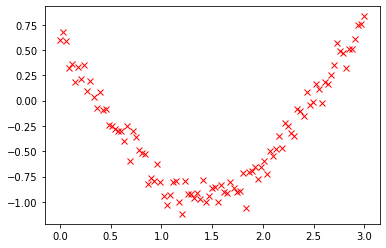

In [14]:
y = f(x, omega, phi) + .1*np.random.normal(size=len(x))
plt.figure()
plt.plot(x,y,'rx')

In [15]:
res = optimize.curve_fit(f, x, y)   

In [16]:
omega, phi = res[0]

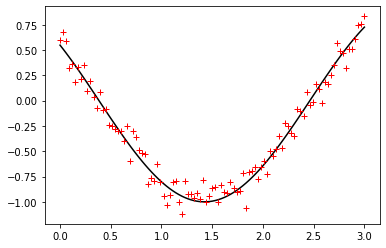

In [17]:
plt.plot(x,f(x,omega,phi),'k-')
plt.plot(x,y,'r+')

Consider a different omega value

### omega = 2

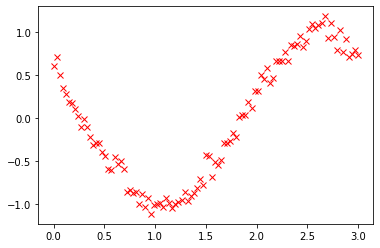

In [18]:
omega = 2
phi = 1
y = f(x, omega, phi) + .1*np.random.normal(size=len(x))
plt.figure()
plt.plot(x,y,'rx')

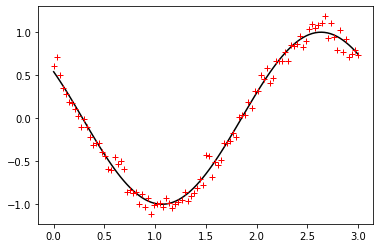

In [19]:
res = optimize.curve_fit(f, x, y)   
omega, phi = res[0]
plt.figure()
plt.plot(x,f(x,omega,phi),'k-')
plt.plot(x,y,'r+')

In [20]:
res

(array([2.00495868, 1.00013997]),
 array([[ 0.00020032, -0.00025026],
        [-0.00025026,  0.00045568]]))

### omega = 3

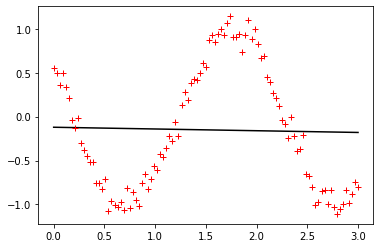

In [21]:
def f(t, omega, phi):
    return np.cos(omega * t + phi)
N = 101
x = np.linspace(0, 3, N)

omega = 3
phi = 1
y = f(x, omega, phi) + .1*np.random.normal(size=len(x))
res = optimize.curve_fit(f, x, y)   
omega, phi = res[0]
plt.figure()
plt.plot(x,f(x,omega,phi),'k-')
plt.plot(x,y,'r+')

In [22]:
res

(array([0.02001408, 1.69187351]),
 array([[ 0.00661901, -0.00989767],
        [-0.00989767,  0.01986257]]))

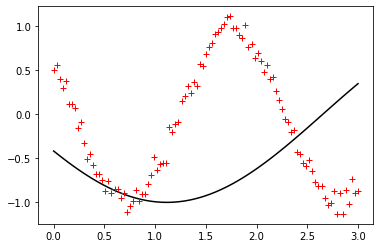

In [23]:
# try some bounds...
def f(t, omega, phi):
    return np.cos(omega * t + phi)
N = 101
x = np.linspace(0, 3, N)


omega = 3
phi = 1
y = f(x, omega, phi) + .1*np.random.normal(size=len(x))
res = optimize.curve_fit(f, x, y, bounds = ([0,1],[2,2]))
omega, phi = res[0]
plt.figure()
plt.plot(x,f(x,omega,phi),'k-')
plt.plot(x,y,'r+')

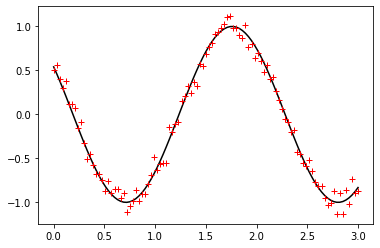

In [24]:
# If we specify the right bounds...
def f(t, omega, phi):
    return np.cos(omega * t + phi)
N = 101
x = np.linspace(0, 3, N)

res = optimize.curve_fit(f, x, y, bounds = ([2,1],[4,2]))   
omega, phi = res[0]
plt.figure()
plt.plot(x,f(x,omega,phi),'k-')
plt.plot(x,y,'r+')

In [25]:
res

(array([3.0045124, 1.       ]),
 array([[ 0.00017585, -0.00023494],
        [-0.00023494,  0.0004437 ]]))

## Constrained optimization

### Example 1

Consider the two-dimensional function

$$ f(x_0, x_1) = \sqrt{ (x_0-3)^2 + (x_1 - 2)^2 } $$

subjecto to the constrains of

$$ -1.5 \leq x_0 \leq 1.5$$
$$ -1.5 \leq x_1 \leq 1.5$$

**Note 1**  Without the constraints the $f(x_0,x_1)$ would occur at $x_0=3$ and $x_1=2$.

**Note 2** The derivatives (or gradient) of $f$ with respect to $x_0$ and $x_1$ are (Exercise: verify this!)

$$ \frac{\partial f}{\partial x_0} = \frac{x_0 - 3}{f}$$
$$ \frac{\partial f}{\partial x_1} = \frac{x_1 - 2}{f}$$

See the function `f_prime(x)` below.

In [26]:
def f(x):
   return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

In [27]:
res = optimize.minimize(f, np.array([0, 0]), bounds=((-1.5, 1.5), (-1.5, 1.5))) 
res

      fun: 1.5811388300841898
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.94868331, -0.31622778])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([1.5, 1.5])

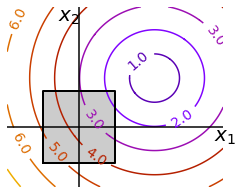

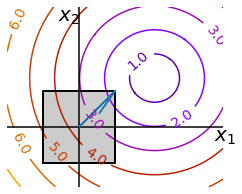

In [28]:
x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

for i in (1, 2):
    # Create 2 figure: only the second one will have the optimization
    # path
    plt.figure(i, figsize=(3, 2.5))
    plt.clf()                           # clear the current figure
    plt.axes([0, 0, 1, 1])

    contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                        extent=[-3, 6, -2.5, 5],
                        cmap=plt.cm.gnuplot)
    plt.clabel(contours,
            inline=1,
            fmt='%1.1f',
            fontsize=14)
    plt.plot([-1.5, -1.5,  1.5,  1.5, -1.5],
            [-1.5,  1.5,  1.5, -1.5, -1.5], 'k', linewidth=2)
    plt.fill_between([ -1.5,  1.5],
                    [ -1.5, -1.5],
                    [  1.5,  1.5],
                    color='.8')
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')

    plt.text(-.9, 4.4, '$x_2$', size=20)
    plt.text(5.6, -.6, '$x_1$', size=20)
    plt.axis('equal')
    plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


# We don't use the gradient, as with the gradient, L-BFGS is too fast,
# and finds the optimum without showing us a pretty path
def f_prime(x):
    r = np.sqrt((x[0] - 3)**2 + (x[0] - 2)**2)
    return np.array(((x[0] - 3)/r, (x[0] - 2)/r))

optimize.minimize(f, np.array([0, 0]), method="L-BFGS-B",
                     bounds=((-1.5, 1.5), (-1.5, 1.5)))

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

In [29]:
# accumulated has the search paths
accumulated

array([[1.50000000e+00, 1.50000000e+00],
       [1.00000000e-08, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e-08],
       [1.50000000e+00, 1.50000000e+00],
       [8.32050305e-01, 5.54700197e-01],
       [8.32050295e-01, 5.54700207e-01],
       [1.50000000e+00, 1.50000000e+00],
       [1.50000001e+00, 1.50000000e+00],
       [1.50000000e+00, 1.50000001e+00]])

### Example 2

Consider the function

$$ f(x_0, x_1) = \sqrt{ (x_0-3)^2 + (x_1 - 2)^2 } $$

subject to the constrains: $g(x_0, x_1) \geq 0$ where

$$ g(x_0, x_1) = 1.5 - ( \left| x_0 \right| + \left| x_1 \right|)$$.

$g \geq 0$ is the shaded region plotted below. (Quiz: why?)

(-1.65, 1.65, -1.65, 1.65)

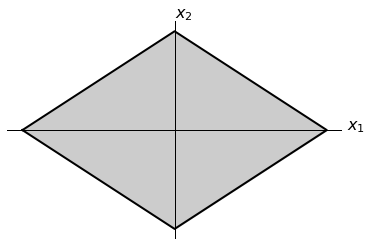

In [30]:
# Plot the geometry of g

plt.figure()
plt.plot([-1.5,    0,  1.5,    0, -1.5],
        [   0,  1.5,    0, -1.5,    0], 'k', linewidth=2)
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.axvline(0, color='k', linewidth=1)
plt.axhline(0, color='k', linewidth=1)
plt.text(0, 1.7, '$x_2$', size=16)
plt.text(1.7,0, '$x_1$', size=16)
plt.axis('off')

`fill_between()`: https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.fill_between.html

#### Preparation

Some of the tricks we will use in the code further below:

In [31]:
x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]
x = x.T
y = y.T
x

array([[-2.03, -1.99, -1.95, ...,  4.09,  4.13,  4.17],
       [-2.03, -1.99, -1.95, ...,  4.09,  4.13,  4.17],
       [-2.03, -1.99, -1.95, ...,  4.09,  4.13,  4.17],
       ...,
       [-2.03, -1.99, -1.95, ...,  4.09,  4.13,  4.17],
       [-2.03, -1.99, -1.95, ...,  4.09,  4.13,  4.17],
       [-2.03, -1.99, -1.95, ...,  4.09,  4.13,  4.17]])

In [32]:
# This function ensures that the result is an numpy array
np.atleast_1d(1.5 - np.sum(np.abs(x)))

array([-32908.08])

In [33]:
# otherwise
1.5 - np.sum(np.abs(x))

-32908.08

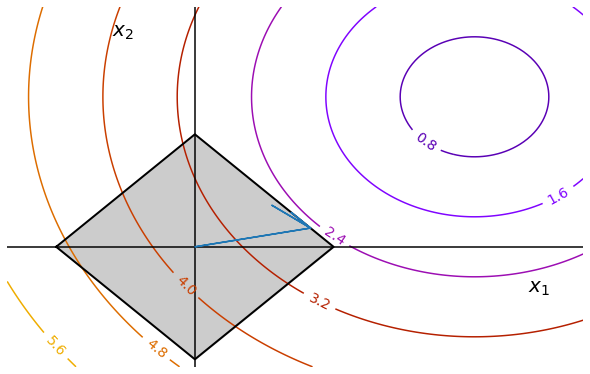

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

x, y = np.mgrid[-2.03:4.2:.04, -1.6:3.2:.04]
x = x.T
y = y.T

plt.figure(1, figsize=(8, 5))
plt.clf()
plt.axes([0, 0, 1, 1])

contours = plt.contour(np.sqrt((x - 3)**2 + (y - 2)**2),
                    extent=[-2.03, 4.2, -1.6, 3.2],
                    cmap=plt.cm.gnuplot)
plt.clabel(contours,
        inline=1,
        fmt='%1.1f',
        fontsize=14)
plt.plot([-1.5,    0,  1.5,    0, -1.5],
        [   0,  1.5,    0, -1.5,    0], 'k', linewidth=2)
plt.fill_between([ -1.5,    0,  1.5],
                [    0, -1.5,    0],
                [    0,  1.5,    0],
                color='.8')
plt.axvline(0, color='k')
plt.axhline(0, color='k')

plt.text(-.9, 2.8, '$x_2$', size=20)
plt.text(3.6, -.6, '$x_1$', size=20)
plt.axis('tight')
plt.axis('off')

# And now plot the optimization path
accumulator = list()

def f(x):
    # Store the list of function calls
    accumulator.append(x)
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)


def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

optimize.minimize(f, np.array([0, 0]), method="SLSQP",
                     constraints={"fun": constraint, "type": "ineq"})

accumulated = np.array(accumulator)
plt.plot(accumulated[:, 0], accumulated[:, 1])

In [35]:
accumulated

array([[1.25004696e+00, 2.49953040e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.49011612e-08, 0.00000000e+00],
       [0.00000000e+00, 1.49011612e-08],
       [1.25004696e+00, 2.49953040e-01],
       [1.25004696e+00, 2.49953040e-01],
       [8.32050309e-01, 5.54700196e-01],
       [8.32050294e-01, 5.54700211e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.04074055e+00, 4.59259463e-01],
       [1.04074054e+00, 4.59259478e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.24360688e+00, 2.56393137e-01],
       [1.24360686e+00, 2.56393152e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.25004696e+00, 2.49953040e-01],
       [1.25004697e+00, 2.49953040e-01],
       [1.25004696e+00, 2.49953055e-01]])